In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np





In [189]:
def delete_columns_from_csv(file_path, columns_to_delete, output_file_path=None):
   
    df = pd.read_csv(file_path)
    
    
    df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
    
    
    if output_file_path:
        df.to_csv(output_file_path, index=False)
    
    return df


In [190]:
### Profile 
file_path_Profile = "C:\\Users\\annak\\Desktop\\ML-Project\\company_profiles.csv"
columns_to_delete_Profile = ['description', 'mic_code','website','type','CEO','address','city','phone']
output_file_path_profile = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjetProfile.csv'
### Income
file_path_Income = "C:\\Users\\annak\\Desktop\\ML-Project\\income_statements.csv"
columns_to_delete_Income = ['pretax_income', 'income_tax','ebit']
output_file_path_Income = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjetIncome.csv'

### cash flow 
file_path_Cash_Flow = "C:\\Users\\annak\\Desktop\\ML-Project\\cash_flow_data.csv"
columns_to_delete_Cash_Flow = [ 'operating_activities.net_income','operating_activities.depreciation','operating_activities.deferred_taxes','operating_activities.stock_based_compensation','operating_activities.other_non_cash_items','operating_activities.accounts_receivable','operating_activities.accounts_payable','operating_activities.other_assets_liabilities','investing_activities.capital_expenditures','investing_activities.net_intangibles','investing_activities.net_acquisitions','investing_activities.purchase_of_investments','investing_activities.sale_of_investments','investing_activities.other_investing_activity','financing_activities.long_term_debt_issuance','financing_activities.long_term_debt_payments','financing_activities.short_term_debt_issuance','financing_activities.common_stock_issuance','financing_activities.common_stock_repurchase','financing_activities.common_dividends','financing_activities.other_financing_charges','exchange_timezone','period']
output_file_path_Cash_Flow = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjet_CashFlow.csv'

### modified csv all 

modified_df_Profile = delete_columns_from_csv(file_path_Profile, columns_to_delete_Profile, output_file_path_profile)
modified_df_Income = delete_columns_from_csv(file_path_Income, columns_to_delete_Income, output_file_path_Income)
modified_df_CashFlow = delete_columns_from_csv(file_path_Cash_Flow, columns_to_delete_Cash_Flow, output_file_path_Cash_Flow)


In [191]:
modified_df_Profile.columns

Index(['symbol', 'name', 'exchange', 'sector', 'industry', 'employees', 'zip',
       'state', 'country'],
      dtype='object')

balance_sheet_data - modify to be a table and not array with array as string in csv

In [192]:
from pandas import json_normalize
import ast

df = pd.read_csv("C:\\Users\\annak\\Desktop\\ML-Project\\balance_sheet_data.csv")


def convert_if_string(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x

def recursive_flatten_columns(df, prefix=''):
    for column in df.columns:

        df[column] = df[column].apply(convert_if_string)
        
        if isinstance(df[column].iloc[0], dict):
            # Flatten dictionaries directly into the DataFrame
            temp_df = json_normalize(df[column])
            temp_df.columns = [f"{prefix}{column}.{subcol}" for subcol in temp_df.columns]
            df = df.drop(column, axis=1).join(temp_df)
        elif isinstance(df[column].iloc[0], list):

            pass  
    return df

df_flattened = recursive_flatten_columns(df)


In [193]:
columns_to_keep = [
    "fiscal_date", 
    "symbol", 
    "assets.total_assets", 
    "assets.current_assets.total_current_assets", 
    "assets.non_current_assets.total_non_current_assets", 
    "liabilities.total_liabilities", 
    "liabilities.current_liabilities.short_term_debt", 
    "liabilities.current_liabilities.total_current_liabilities", 
    "liabilities.non_current_liabilities.long_term_debt", 
    "liabilities.non_current_liabilities.total_non_current_liabilities", 
    "shareholders_equity.common_stock", 
    "shareholders_equity.retained_earnings", 
    "shareholders_equity.other_shareholders_equity", 
    "shareholders_equity.total_shareholders_equity", 
    "shareholders_equity.additional_paid_in_capital", 
    "shareholders_equity.treasury_stock", 
    "shareholders_equity.minority_interest"
]

df_filtered = df_flattened[columns_to_keep]

print(df_filtered.head())


  fiscal_date symbol  assets.total_assets  \
0  2023-06-30   MSFT         4.119760e+11   
1  2022-06-30   MSFT         3.648400e+11   
2  2021-06-30   MSFT         3.337790e+11   
3  2020-06-30   MSFT         3.013110e+11   
4  2019-06-30   MSFT         2.865560e+11   

   assets.current_assets.total_current_assets  \
0                                1.842570e+11   
1                                1.696840e+11   
2                                1.844060e+11   
3                                1.819150e+11   
4                                1.755520e+11   

   assets.non_current_assets.total_non_current_assets  \
0                                       2.277190e+11    
1                                       1.951560e+11    
2                                       1.493730e+11    
3                                       1.193960e+11    
4                                       1.110040e+11    

   liabilities.total_liabilities  \
0                   2.057530e+11   
1                  

In [194]:
rename_columns = {
    "fiscal_date": "fiscal_date",
    "symbol": "symbol",
    "assets.total_assets": "total_assets",
    "assets.current_assets.total_current_assets": "total_current_assets",
    "assets.non_current_assets.total_non_current_assets": "total_non_current_assets",
    "liabilities.total_liabilities": "total_liabilities",
    "liabilities.current_liabilities.short_term_debt": "short_term_debt",
    "liabilities.current_liabilities.total_current_liabilities": "total_current_liabilities",
    "liabilities.non_current_liabilities.long_term_debt": "long_term_debt",
    "liabilities.non_current_liabilities.total_non_current_liabilities": "total_non_current_liabilities"
}


df_filtered = df_filtered.rename(columns=rename_columns)


print(df_filtered.head())

  fiscal_date symbol  total_assets  total_current_assets  \
0  2023-06-30   MSFT  4.119760e+11          1.842570e+11   
1  2022-06-30   MSFT  3.648400e+11          1.696840e+11   
2  2021-06-30   MSFT  3.337790e+11          1.844060e+11   
3  2020-06-30   MSFT  3.013110e+11          1.819150e+11   
4  2019-06-30   MSFT  2.865560e+11          1.755520e+11   

   total_non_current_assets  total_liabilities  short_term_debt  \
0              2.277190e+11       2.057530e+11     5.247000e+09   
1              1.951560e+11       1.982980e+11     2.749000e+09   
2              1.493730e+11       1.917910e+11     8.072000e+09   
3              1.193960e+11       1.830070e+11     3.749000e+09   
4              1.110040e+11       1.669680e+11     5.516000e+09   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   

In [195]:
df_filtered.to_csv('flat_balance_sheet_data.csv', index=False)


In [196]:
modified_df_CashFlow.head() 	

fiscal_date  end_cash_position  income_tax_paid  interest_paid  \
0  2020-06-30        13576000000              NaN            NaN   
1  2021-06-30        14224000000              NaN            NaN   
2  2022-06-30        13931000000              NaN            NaN   
3  2023-06-30        34704000000              NaN            NaN   
4  2020-09-30        39789000000     9.501000e+09   3.002000e+09   

   free_cash_flow  operating_activities.operating_cash_flow  \
0    4.523400e+10                              6.089400e+10   
1    5.611800e+10                              7.798900e+10   
2    6.514900e+10                              8.944400e+10   
3    5.947500e+10                              8.738600e+10   
4    7.336500e+10                              8.067400e+10   

   investing_activities.investing_cash_flow  \
0                             -1.222300e+10   
1                             -2.757700e+10   
2                             -3.031100e+10   
3                             -2.268000e+10   
4                             -4.289000e+09   

   financing_activities.financing_cash_flow symbol            name currency  \
0                             -4.603100e+10   MSFT  Microsoft Corp      USD   
1                             -4.848600e+10   MSFT  Microsoft Corp      USD   
2                             -5.887600e+10   MSFT  Microsoft Corp      USD   
3                             -4.393500e+10   MSFT  Microsoft Corp      USD   
4                             -8.594000e+10   AAPL       Apple Inc      USD   

  exchange mic_code  
0   NASDAQ     XNGS  
1   NASDAQ     XNGS  
2   NASDAQ     XNGS  
3   NASDAQ     XNGS  
4   NASDAQ     XNGS

In [197]:
modified_df_Income.head()

fiscal_date         sales  cost_of_goods  gross_profit  operating_income  \
0  30/06/2023  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1  30/06/2022  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2  30/06/2021  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3  30/06/2020  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4  30/09/2023  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...        ebitda  \
0              7.446000e+09  ...  1.051550e+11   
1              7.496000e+09  ...  9.990500e+10   
2              7.547000e+09  ...  8.383100e+10   
3              7.610000e+09  ...  6.839500e+10   
4              1.574423e+10  ...  1.291880e+11   

   net_income_continuous_operations  minority_interests  \
0                      7.236100e+10                 NaN   
1                      7.273800e+10                 NaN   
2                      6.127100e+10                 NaN   
3                      4.428100e+10                 NaN   
4                      9.699500e+10                 NaN   

   preferred_stock_dividends  research_and_development  \
0                        NaN              2.719500e+10   
1                        NaN              2.451200e+10   
2                        NaN              2.071600e+10   
3                        NaN              1.926900e+10   
4                        NaN              2.991500e+10   

   selling_general_and_administrative  other_operating_expenses        income  \
0                        3.033400e+10                       NaN  2.994000e+09   
1                        2.772500e+10                       NaN  2.094000e+09   
2                        2.522400e+10                       NaN  2.131000e+09   
3                        2.470900e+10                       NaN  2.680000e+09   
4                        2.493200e+10                       NaN  3.750000e+09   

        expense  symbol  
0  1.968000e+09    MSFT  
1  2.063000e+09    MSFT  
2  2.346000e+09    MSFT  
3  2.591000e+09    MSFT  
4  3.933000e+09    AAPL  

[5 rows x 21 columns]

now we merge all data in symbol+year, we will create year colunm for each table first

In [198]:
import pandas as pd

def add_year_column(dataframe, date_column='Date', output_column='year', date_format='%d/%m/%Y'):
    """
    Adds a 'year' column to a DataFrame based on a specified 'Date' column.
    
    Parameters:
    - dataframe: pd.DataFrame, the DataFrame to modify.
    - date_column: str, the name of the column containing date information.
    - output_column: str, the name of the new column to be added, containing the extracted year.
    - date_format: str, the format of the dates in the date_column.
    
    Returns:
    - A DataFrame with the new 'year' column added.
    """
    # Ensure the date_column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    
    # Extract the year and create the new column
    dataframe[output_column] = dataframe[date_column].dt.year
    
    return dataframe







In [199]:
modified_df_Income = add_year_column(modified_df_Income, 'fiscal_date', 'year')
modified_df_CashFlow = add_year_column(modified_df_CashFlow,'fiscal_date', 'year','%Y-%m-%d')
modified_balance_sheet = add_year_column(df_filtered, 'fiscal_date', 'year', '%Y-%m-%d')

print(modified_df_Income[['fiscal_date', 'year']].head())
print(modified_df_CashFlow[['fiscal_date', 'year']].head())
print(modified_balance_sheet[['fiscal_date', 'year']].head())

  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2023-09-30  2023
  fiscal_date  year
0  2020-06-30  2020
1  2021-06-30  2021
2  2022-06-30  2022
3  2023-06-30  2023
4  2020-09-30  2020
  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2019-06-30  2019


Merge

In [200]:
print(len(modified_df_Income))
print(len(modified_df_CashFlow))
print(len(modified_balance_sheet))

5478
5439
8087


In [201]:
# Check for duplicates based on 'year' and 'symbol'
print(modified_df_Income.duplicated(subset=['year', 'symbol']).sum())
print(modified_df_CashFlow.duplicated(subset=['year', 'symbol']).sum())
print(modified_balance_sheet.duplicated(subset=['year', 'symbol']).sum())


12
6
99


drop duplicates

In [202]:

modified_df_Income = modified_df_Income.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_df_CashFlow = modified_df_CashFlow.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_balance_sheet = modified_balance_sheet.drop_duplicates(subset=['year', 'symbol'], keep=False)

print( len(modified_df_Income))
print(len(modified_df_CashFlow))
print( len(modified_balance_sheet))


5454
5427
7890


In [203]:
merged_df_2 = pd.merge(modified_df_Income, modified_df_CashFlow, on=['year', 'symbol'], how='inner')


final_merged_df = pd.merge(merged_df_2, modified_balance_sheet, on=['year', 'symbol'], how='inner')

print(len(final_merged_df))
print(final_merged_df.head())

5365
  fiscal_date_x         sales  cost_of_goods  gross_profit  operating_income  \
0    2023-06-30  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1    2022-06-30  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2    2021-06-30  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3    2020-06-30  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4    2023-09-30  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...  total_current_liabilities  long_term_debt  \
0              7.446000e+09  ...            

In [204]:
final_merged_df.to_csv('final_merged_df', index=False)


missing values


In [205]:
# we drop all data without net income. after earching the data for the rest, we safely fillna(0).
final_merged_df = final_merged_df.dropna(subset=[ 'net_income'])
final_merged_df = final_merged_df.fillna(0)


print(f"Number of rows after dropping NaNs in 'net_income': {final_merged_df.shape[0]}")

Number of rows after dropping NaNs in 'net_income': 5363


Next, we want only stocks with 3 years of data and more

In [206]:
ticker_counts = final_merged_df['symbol'].value_counts()

tickers_with_3_or_more_years = ticker_counts[ticker_counts >= 3]
print(f"Number of companies with data for 3 or more years: {len(tickers_with_3_or_more_years)}")

Number of companies with data for 3 or more years: 1439


In [207]:
tickers_to_keep = tickers_with_3_or_more_years.index.tolist()

In [208]:
final_merged_df = final_merged_df[final_merged_df['symbol'].isin(tickers_to_keep)]


print(f"Number of rows after filtering: {final_merged_df.shape[0]}")

Number of rows after filtering: 5088


In [209]:
distinct_tickers_count = final_merged_df['symbol'].nunique()
distinct_tickers_count

1439

In [210]:
final_merged_df = final_merged_df[[ 'year', 'symbol','fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

In [211]:
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   
2               8.865700e+10    5.970300e+10                   1.031340e+11   
3               7.231000e+10    6.724900e+10                   1.106970e+11   
4               1.453080e+11    9.528100e+10                   1.451290e+11   

   shareholders_equity.common_stock  shareholders_equity.retained_earnings  \
0                      9.371800e+10                           1.188480e+11   
1                      8.693900e+10                           8.428100e+10   
2                      8.311100e+10                           5.705500e+10   
3                      8.055200e+10                           3.456600e+10   
4                      7.381200e+10                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  
0                                 0.0                                    0.0  
1                                 0.0                                    0.0  
2                                 0.0                                    0.0  
3                                 0.0                                    0.0  
4                                 0.0                                    0.0  

[5 rows x 46 columns]

In [212]:
corrdf = final_merged_df[['fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

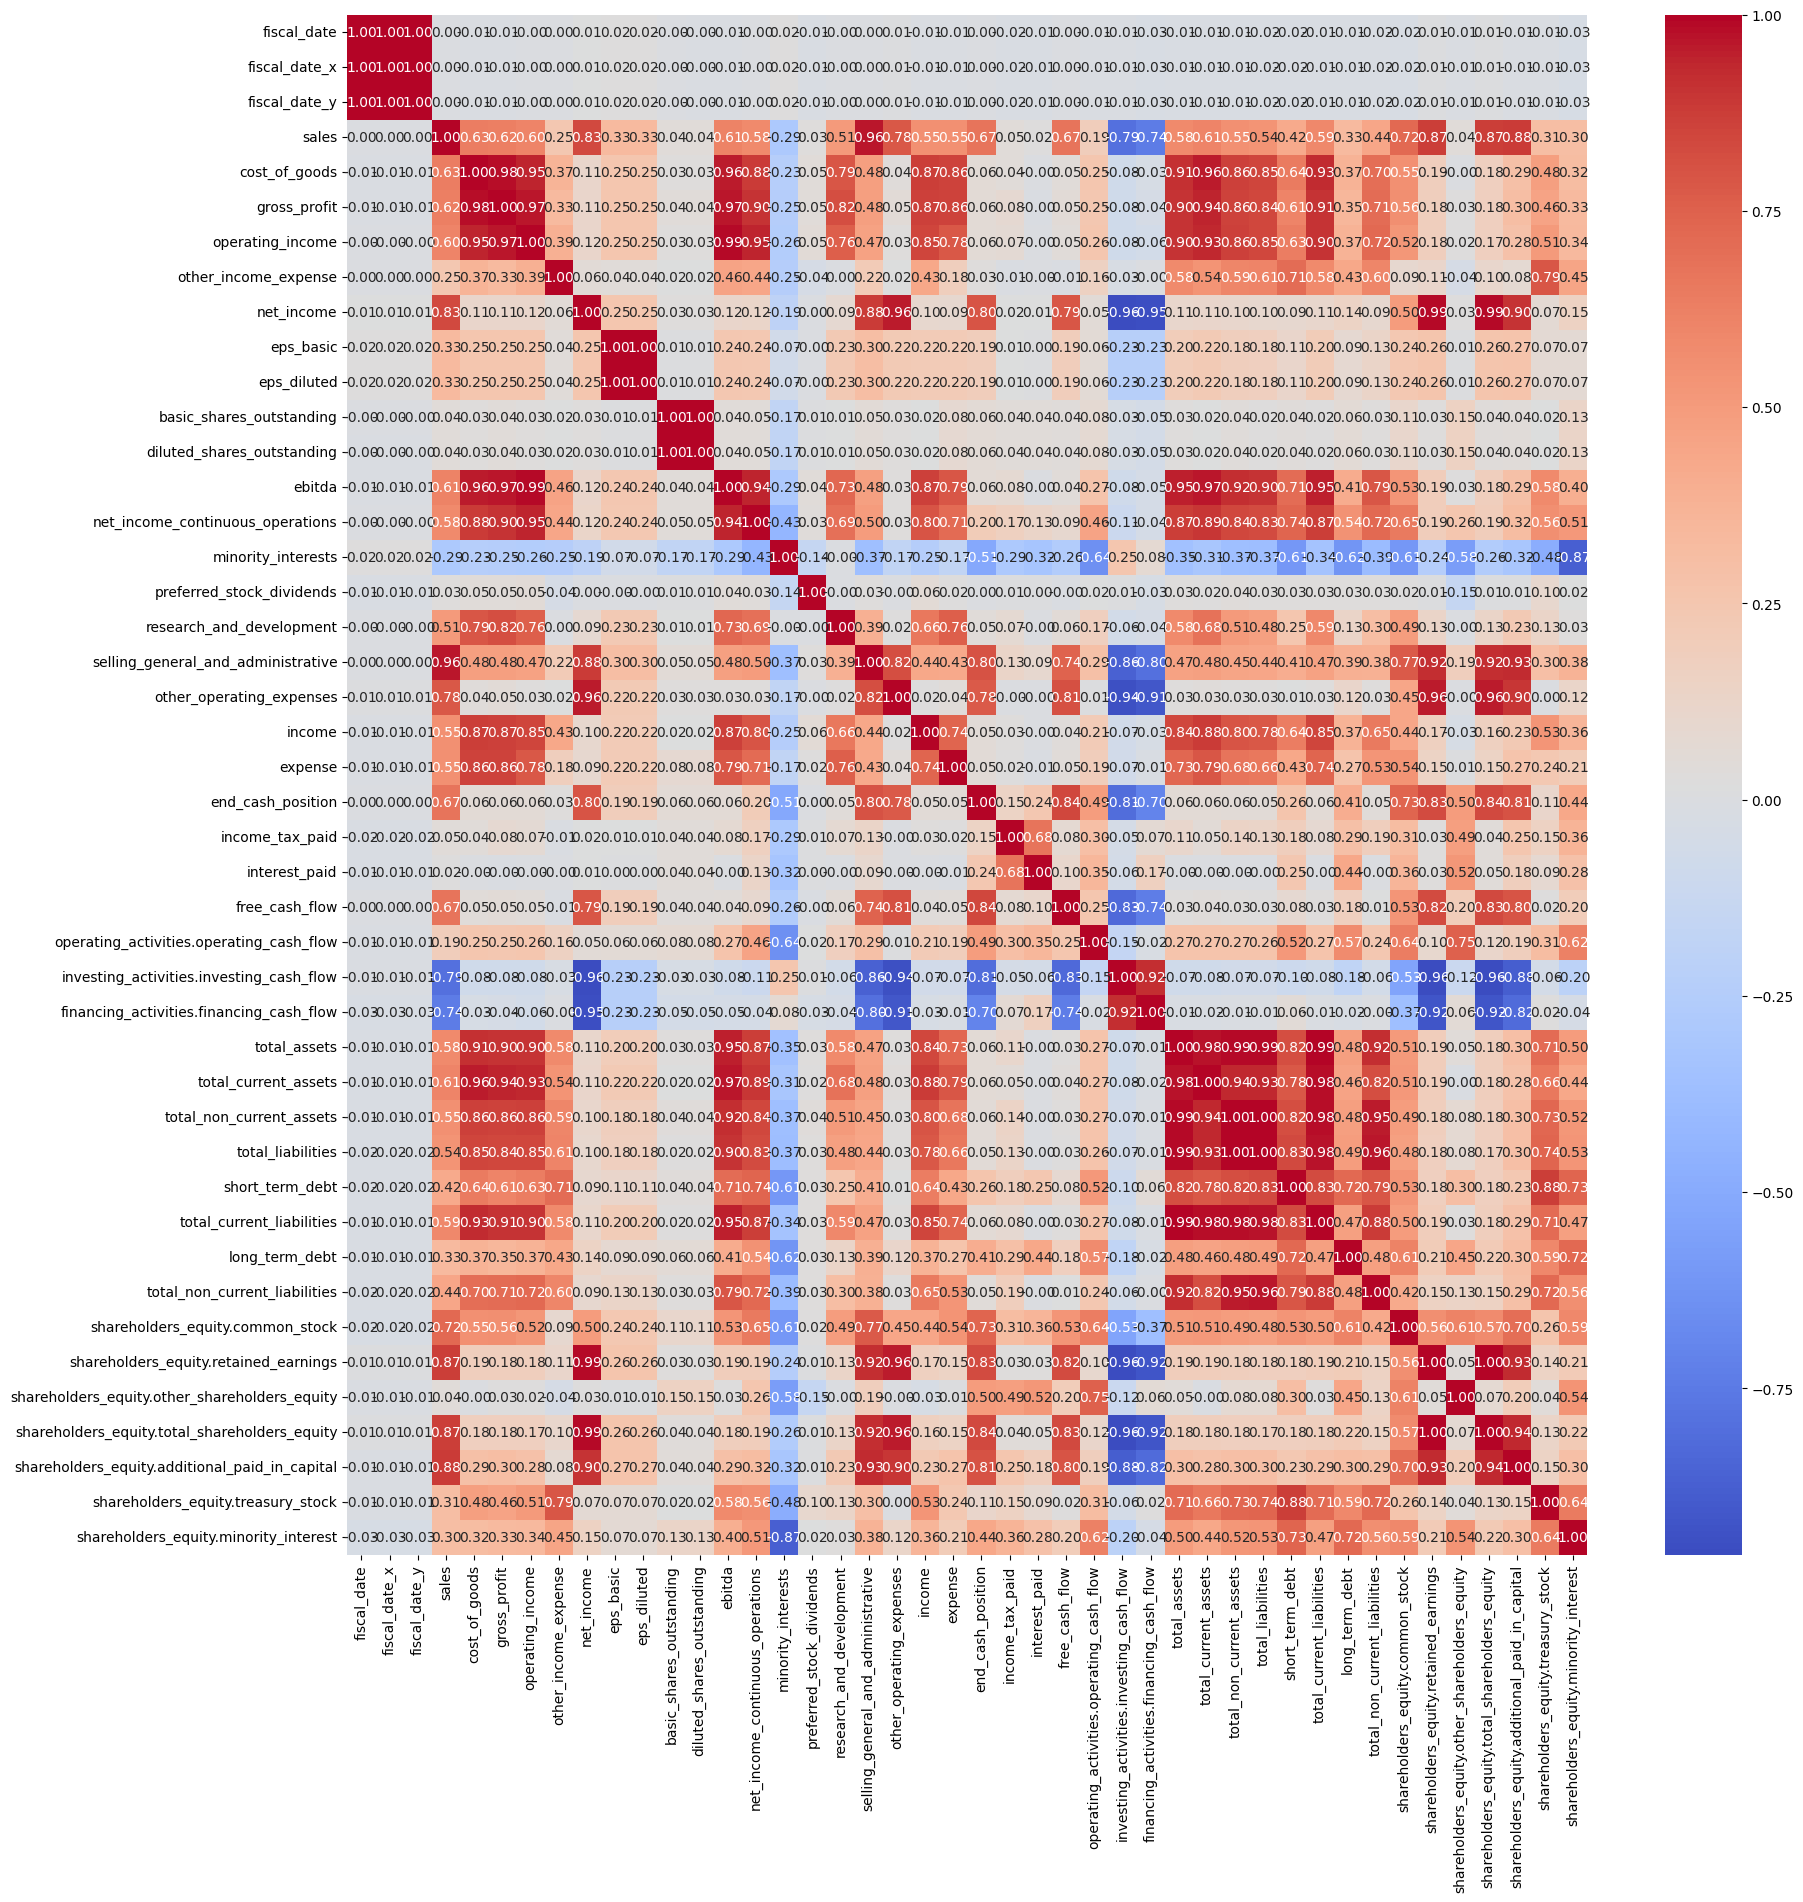

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
corr_matrix = corrdf.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Indicator Functions

In [214]:
def calculate_debt_to_equity_ratio(df):

    numerator = df['long_term_debt'] + df['short_term_debt']

    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])


    df['Debt to Equity Ratio'] = np.divide(numerator, denominator)


    df['Debt to Equity Ratio'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Debt to Equity Ratio'].fillna(0, inplace=True)

    return df


def calculate_Profit_Margin(df):

    numerator = df['net_income'] 


    denominator = np.where((df['sales']) == 0,
                           np.nan,
                           df['sales'] )


    df['Profit Margin'] = np.divide(numerator, denominator)


    df['Profit Margin'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Profit Margin'].fillna(0, inplace=True)

    return df


def calculate_Return_On_Equity(df):

    numerator = df['net_income'] 


    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])



    df['Return On Equity'] = np.divide(numerator, denominator)


    df['Return On Equity'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Equity'].fillna(0, inplace=True)

    return df




def calculate_Return_On_Assets(df):

    numerator = df['net_income'] 


    denominator = np.where((df['total_assets']) == 0,
                           np.nan,
                           df['total_assets'] )


    df['Return On Assets'] = np.divide(numerator, denominator)


    df['Return On Assets'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Assets'].fillna(0, inplace=True)

    return df

In [215]:
final_merged_df=calculate_debt_to_equity_ratio(final_merged_df)
final_merged_df=calculate_Profit_Margin(final_merged_df)
final_merged_df=calculate_Return_On_Equity(final_merged_df)
final_merged_df=calculate_Return_On_Assets(final_merged_df)



final_merged_df.head()


year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   shareholders_equity.retained_earnings  \
0                           1.188480e+11   
1                           8.428100e+10   
2                           5.705500e+10   
3                           3.456600e+10   
4                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   Debt to Equity Ratio  Profit Margin  Return On Equity  Return On Assets  
0              0.290777       0.341462          0.350887          0.175644  
1              0.367895       0.366863          0.436755          0.199370  
2              0.477329       0.364517          0.431522          0.183568  
3              0.600132       0.309625          0.374298          0.146961  
4              1.787533       0.253062          1.560760          0.275098  

[5 rows x 50 columns]

In [216]:
left_columns = [ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

corrdf2 = final_merged_df[[ 'year','sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']]

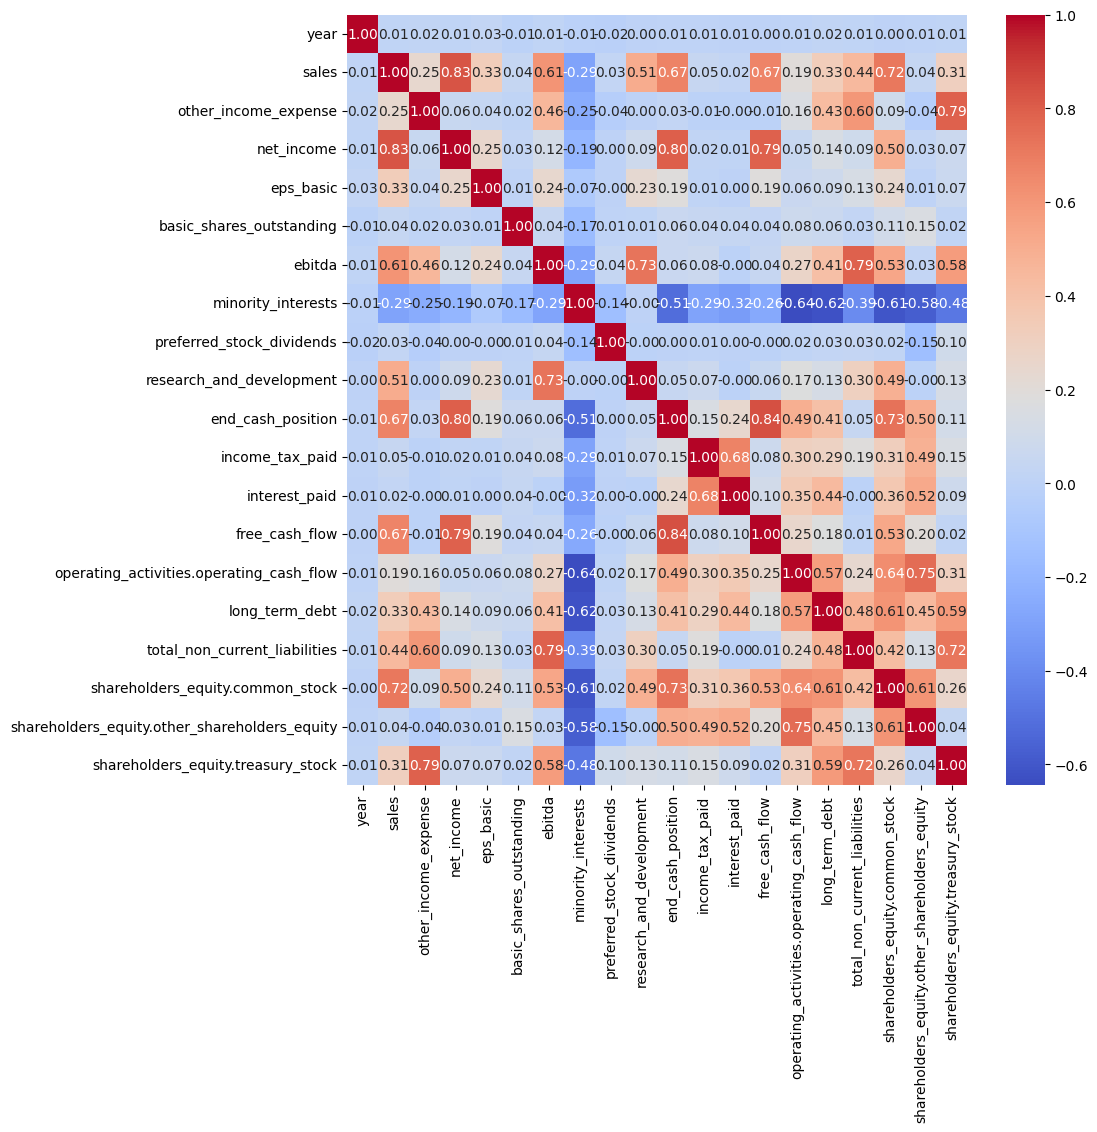

In [217]:


# Assuming `df` is your DataFrame
corr_matrix = corrdf2.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [218]:
final_merged_df = final_merged_df[[ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']]
final_merged_df = pd.merge(final_merged_df, modified_df_Profile, on='symbol', how='inner')

final_merged_df.head()


year symbol         sales  other_income_expense    net_income  eps_basic  \
0  2023   MSFT  2.119150e+11         -2.380000e+08  7.236100e+10       9.72   
1  2022   MSFT  1.982700e+11          3.020000e+08  7.273800e+10       9.70   
2  2021   MSFT  1.680880e+11          1.401000e+09  6.127100e+10       8.12   
3  2020   MSFT  1.430150e+11         -1.200000e+07  4.428100e+10       5.82   
4  2023   AAPL  3.832850e+11         -3.820000e+08  9.699500e+10       6.16   

   basic_shares_outstanding        ebitda  minority_interests  \
0              7.446000e+09  1.051550e+11                 0.0   
1              7.496000e+09  9.990500e+10                 0.0   
2              7.547000e+09  8.383100e+10                 0.0   
3              7.610000e+09  6.839500e+10                 0.0   
4              1.574423e+10  1.291880e+11                 0.0   

   preferred_stock_dividends  ...  Return On Equity  Return On Assets  \
0                        0.0  ...          0.350887          0.175644   
1                        0.0  ...          0.436755          0.199370   
2                        0.0  ...          0.431522          0.183568   
3                        0.0  ...          0.374298          0.146961   
4                        0.0  ...          1.560760          0.275098   

             name  exchange      sector                 industry  employees  \
0  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
1  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
2  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
3  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
4       Apple Inc    NASDAQ  Technology     Consumer Electronics     161000   

          zip  state        country  
0  98052-6399     WA  United States  
1  98052-6399     WA  United States  
2  98052-6399     WA  United States  
3  98052-6399     WA  United States  
4       95014     CA  United States  

[5 rows x 33 columns]

In [231]:
final_merged_df= final_merged_df[['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','free_cash_flow','sector','industry','symbol']]
final_merged_df.head()

sales  other_income_expense    net_income  eps_basic  \
0  2.119150e+11         -2.380000e+08  7.236100e+10       9.72   
1  1.982700e+11          3.020000e+08  7.273800e+10       9.70   
2  1.680880e+11          1.401000e+09  6.127100e+10       8.12   
3  1.430150e+11         -1.200000e+07  4.428100e+10       5.82   
4  3.832850e+11         -3.820000e+08  9.699500e+10       6.16   

   basic_shares_outstanding        ebitda  minority_interests  \
0              7.446000e+09  1.051550e+11                 0.0   
1              7.496000e+09  9.990500e+10                 0.0   
2              7.547000e+09  8.383100e+10                 0.0   
3              7.610000e+09  6.839500e+10                 0.0   
4              1.574423e+10  1.291880e+11                 0.0   

   preferred_stock_dividends  research_and_development  end_cash_position  \
0                        0.0              2.719500e+10        34704000000   
1                        0.0              2.451200e+10        13931000000   
2                        0.0              2.071600e+10        14224000000   
3                        0.0              1.926900e+10        13576000000   
4                        0.0              2.991500e+10        30737000000   

   ...  shareholders_equity.treasury_stock  Debt to Equity Ratio  \
0  ...                                 0.0              0.290777   
1  ...                                 0.0              0.367895   
2  ...                                 0.0              0.477329   
3  ...                                 0.0              0.600132   
4  ...                                 0.0              1.787533   

   Profit Margin  Return On Equity  Return On Assets  free_cash_flow  \
0       0.341462          0.350887          0.175644    5.947500e+10   
1       0.366863          0.436755          0.199370    6.514900e+10   
2       0.364517          0.431522          0.183568    5.611800e+10   
3       0.309625          0.374298          0.146961    4.523400e+10   
4       0.253062          1.560760          0.275098    9.958400e+10   

   free_cash_flow      sector                 industry  symbol  
0    5.947500e+10  Technology  Software—Infrastructure    MSFT  
1    6.514900e+10  Technology  Software—Infrastructure    MSFT  
2    5.611800e+10  Technology  Software—Infrastructure    MSFT  
3    4.523400e+10  Technology  Software—Infrastructure    MSFT  
4    9.958400e+10  Technology     Consumer Electronics    AAPL  

[5 rows x 29 columns]

### Scaling/Normalization 

In [232]:
numeric_columns = ['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

Columns_of_indicators=['Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','free_cash_flow']

categorical_columns = ['symbol', 'sector', 'industry']


numric_df=final_merged_df[numeric_columns]
Ratio_df= final_merged_df[Columns_of_indicators]
Categorical_df= final_merged_df[categorical_columns] 


#### One Hot encoder 


In [236]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

df_categorical_encoded = onehot.fit_transform(Categorical_df)

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### One Approach


In [221]:

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)

X_transformed = qt.fit_transform(numric_df)
X_transformed_Indicators= qt.fit_transform(Ratio_df)


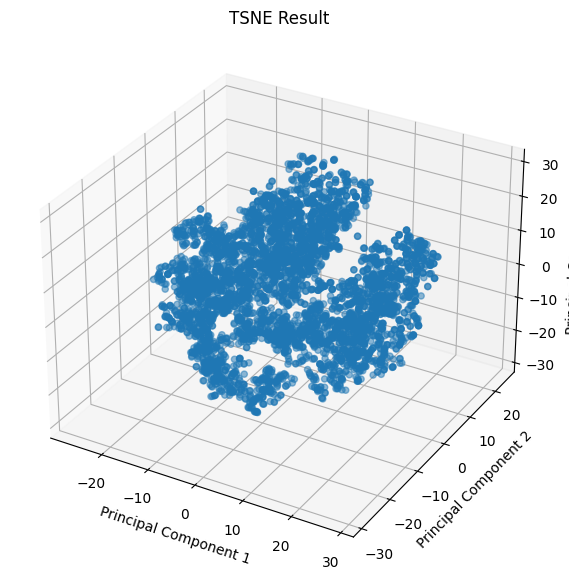

In [296]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

combined_data = np.concatenate([X_transformed, X_transformed_Indicators,df_categorical_encoded], axis=1)

# Now apply t-SNE to the combined data
tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne[:, 0], combined_data_tsne[:, 1], combined_data_tsne[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()



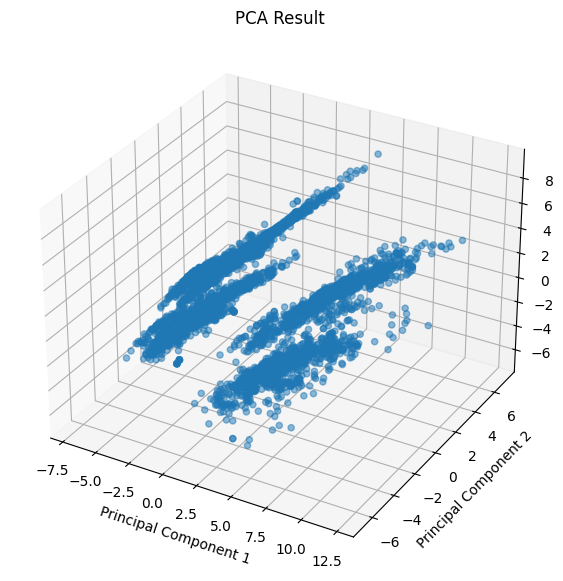

In [259]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

# Initialize PCA
pca = PCA(n_components=n_components)
pca1= PCA(2)
# Fit PCA on the dataset and transform the data
pca_result = pca.fit_transform(combined_data)
pca_result1 = pca1.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

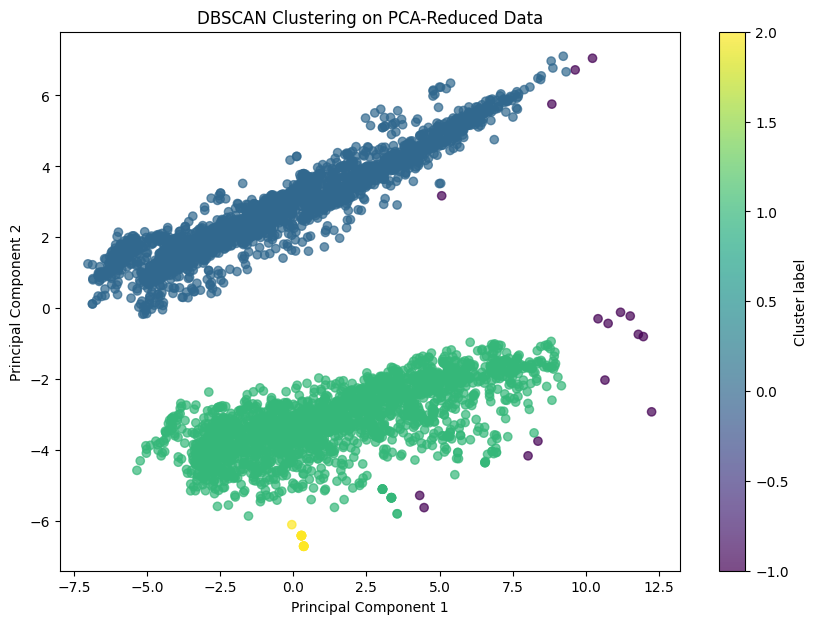

In [286]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_result1[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()


In [323]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming `combined_data` is your original dataset
# First, apply PCA with 3 components


# Now apply DBSCAN on the PCA result
dbscan = DBSCAN(eps=2.2, min_samples=200)  # Adjust these parameters as needed
dbscan_labels = dbscan.fit_predict(pca_result)

# dbscan_labels now contains the cluster labels


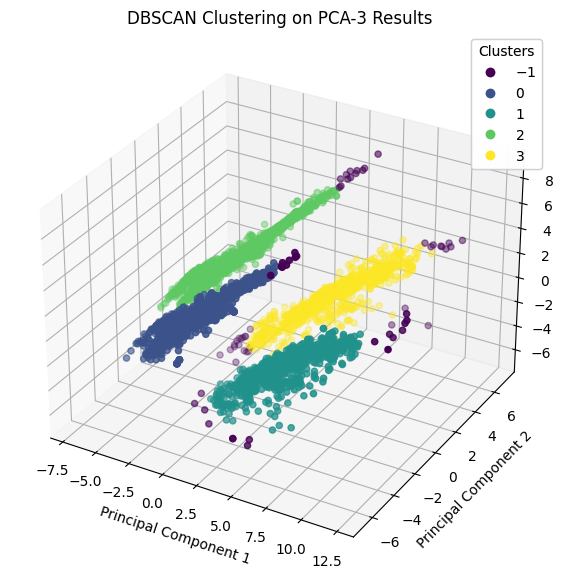

In [324]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=dbscan_labels, cmap='viridis', label=dbscan_labels)

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [328]:
silhouette_avg_dbscan = silhouette_score(pca_result, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

Silhouette Score for DBSCAN: 0.509


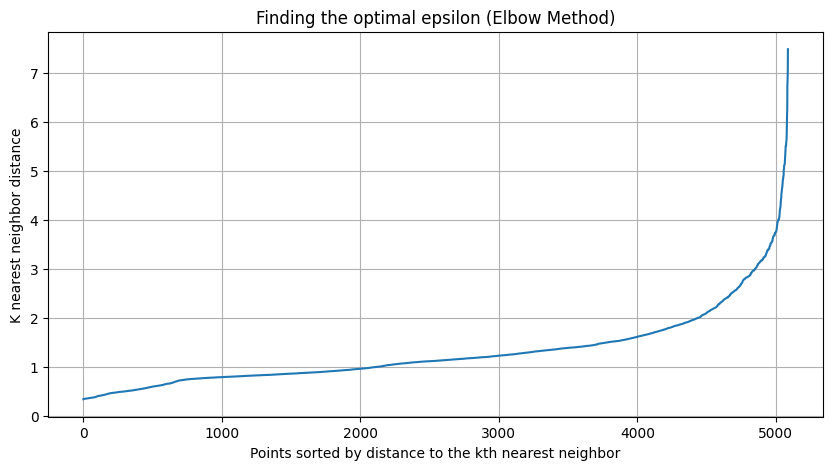

In [320]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 200

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result)
distances, indices = neighbors.kneighbors(pca_result)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


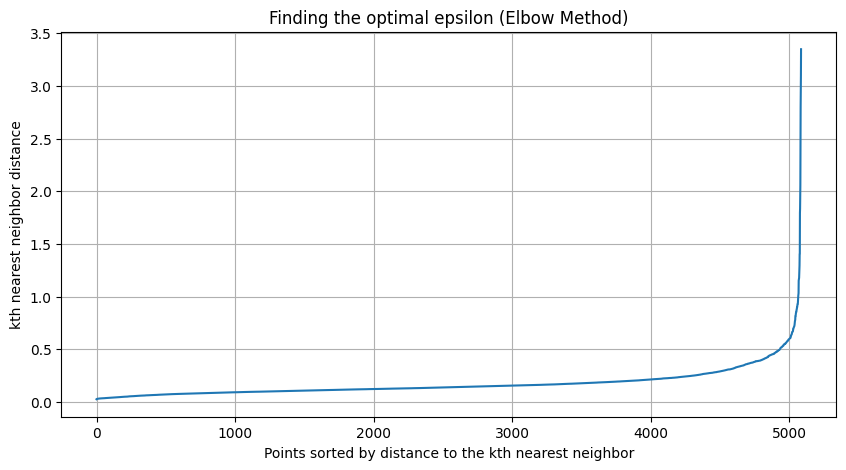

In [282]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 10

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result1)
distances, indices = neighbors.kneighbors(pca_result1)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('kth nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

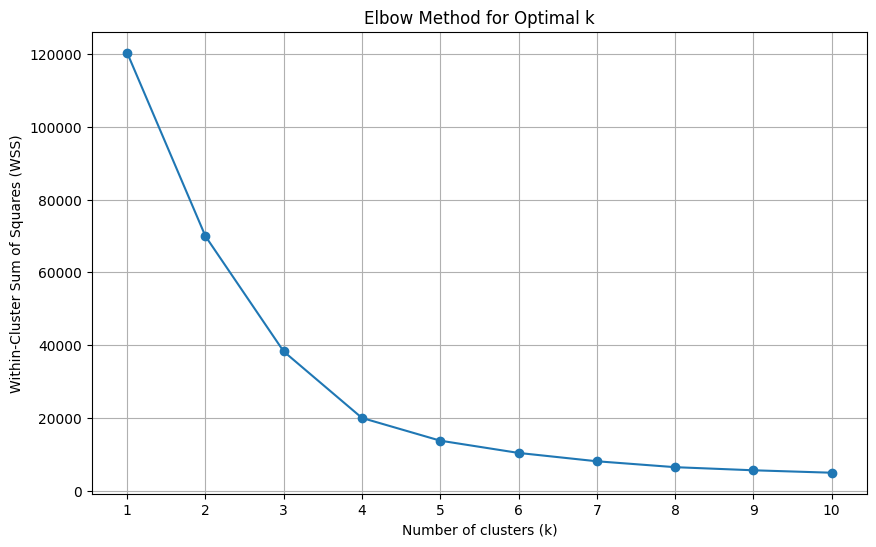

In [266]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is your dataset ready for clustering

# Decide the range of k values to evaluate
k_values = range(1, 11)  # For example, from 1 to 10

# Initialize an empty list to store the WSS for each k
wss_values = []

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit KMeans on the dataset
    kmeans.fit(pca_result1)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


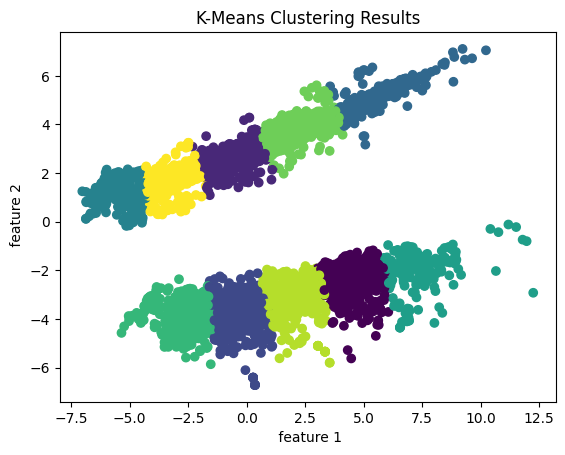

In [274]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 10

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result1)

# Plotting the results
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


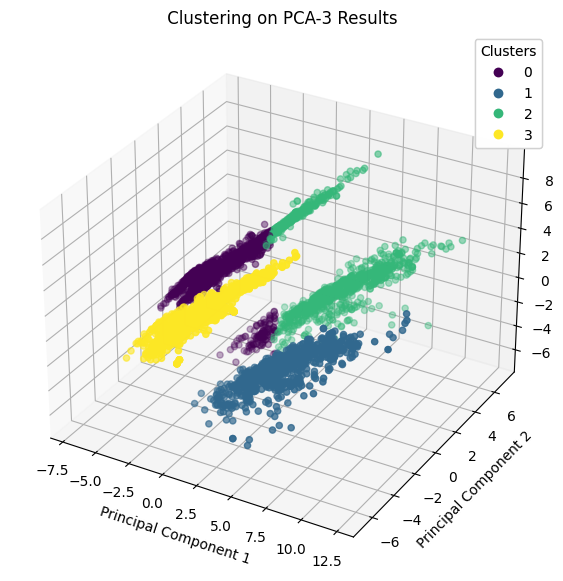

In [279]:

k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [280]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
silhouette_avg = silhouette_score(pca_result, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 4 clusters: 0.495


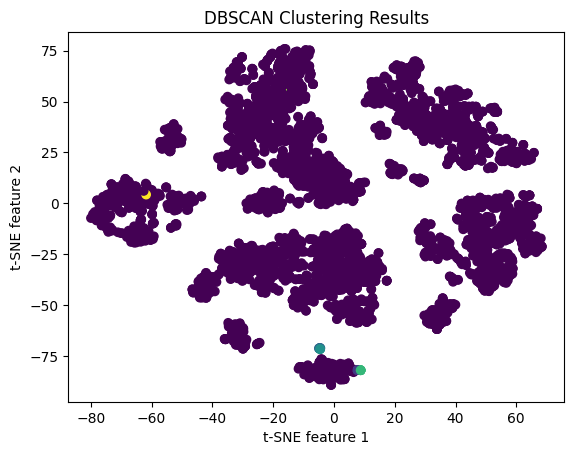

In [226]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values; adjust based on your data
dbscan_labels = dbscan.fit_predict(combined_data)

# Plotting the results
plt.scatter(combined_data_tsne[:, 0], combined_data_tsne[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering Results')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


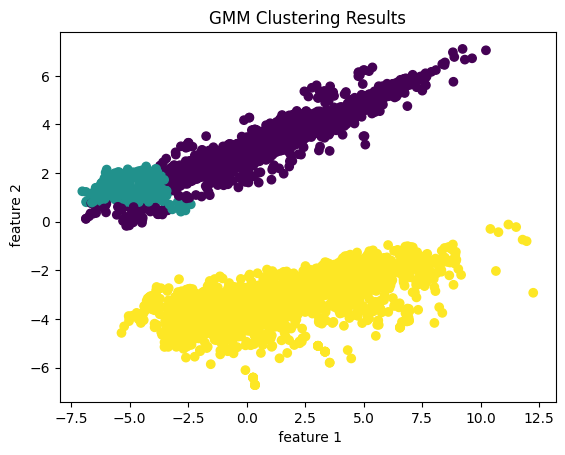

In [299]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Number of components (clusters) to fit
n_components = 3 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result1)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


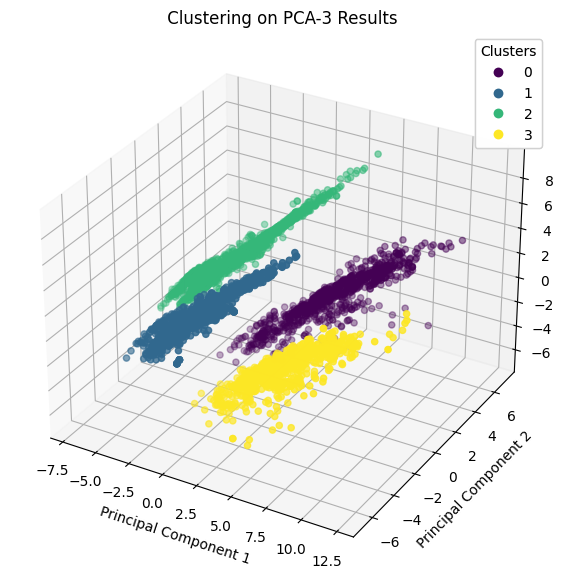

In [301]:
# Number of components (clusters) to fit
n_components = 4 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [326]:
silhouette_avg_gmm = silhouette_score(pca_result, gmm_labels)
print(f"Silhouette Score for GMM (EM): {silhouette_avg_gmm:.3f}")


Silhouette Score for GMM (EM): 0.510


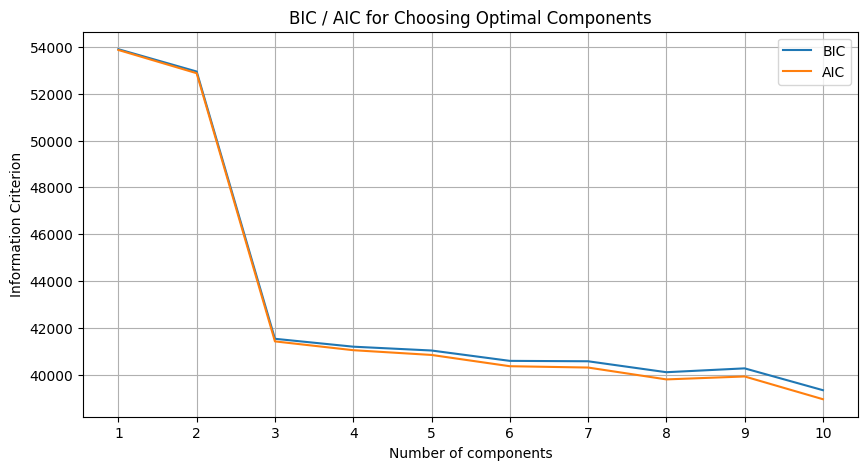

In [297]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your 2D dataset after PCA
n_components_range = range(1, 11)  # Range of possible components
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_result1)
    bics.append(gmm.bic(pca_result1))
    aics.append(gmm.aic(pca_result1))

# Plotting the BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC / AIC for Choosing Optimal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


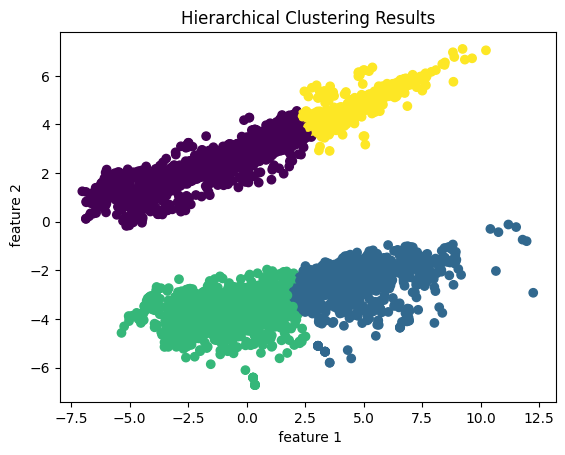

In [303]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Instantiate and fit the model
# The number of clusters is optional; if not specified, each sample is its own cluster
# 'ward' linkage minimizes the variance of clusters being merged
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(pca_result1)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


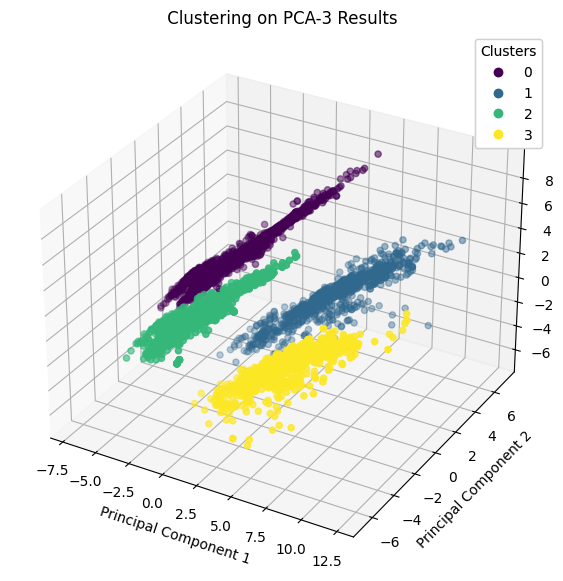

In [308]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(pca_result)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [329]:
silhouette_avg_hierarchical = silhouette_score(pca_result, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Silhouette Score for Hierarchical Clustering: 0.510


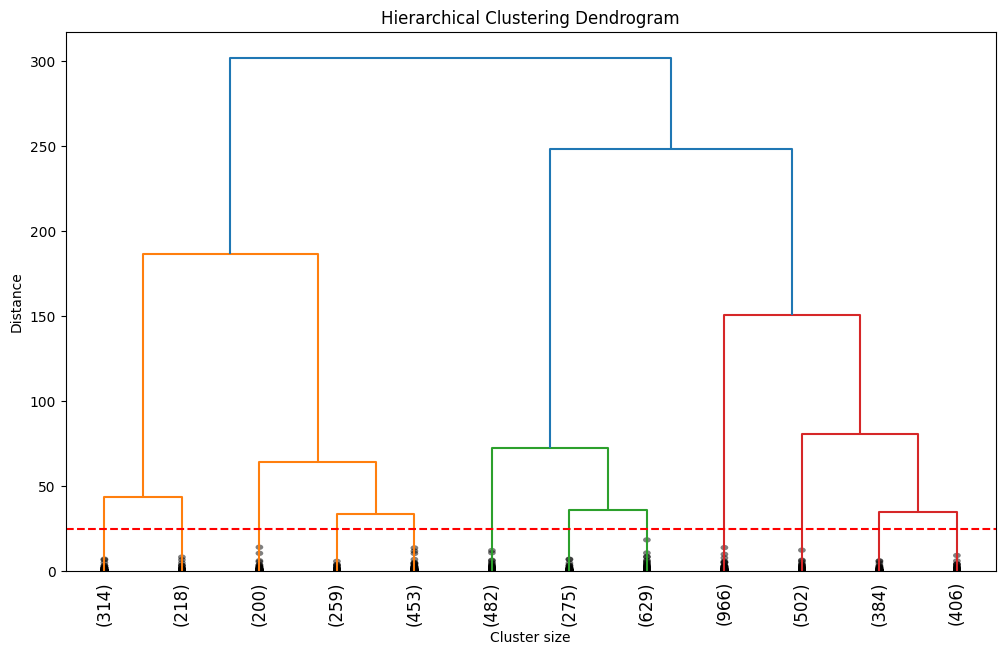

In [304]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your dataset after dimensionality reduction
# Generate the linkage matrix using Ward's method
Z = linkage(pca_result1, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# This line draws a threshold line to help identify the number of clusters
plt.axhline(y=25, color='r', linestyle='--')  # Adjust 'y' based on your dendrogram

plt.show()


### Model


### Second Approach -Nir 

In [243]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np



def custom_normalize_row(row):
    max_abs_value = np.max(np.abs(row))
    if max_abs_value == 0:
        return row
    else:
        return row / max_abs_value

# Apply the custom row-wise normalization to each DataFrame
monetary_df_scaled_row = numric_df.apply(custom_normalize_row, axis=1)
ratios_df_scaled_row = Ratio_df.apply(custom_normalize_row, axis=1)
if isinstance(df_categorical_encoded, np.ndarray):
    # Assuming you want to name the columns based on the encoding process
    # This step might need adjustment based on how df_categorical_encoded was created
    df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=[f'Cat_{i}' for i in range(df_categorical_encoded.shape[1])])

df_scaled_combined = pd.concat([monetary_df_scaled_row, ratios_df_scaled_row, df_categorical_encoded], axis=1)
# Convert df_categorical_encoded to a DataFrame if it's a NumPy array




In [244]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # n_components can be 2 or 3 for visualization
tsne_results = tsne.fit_transform(df_scaled_combined)

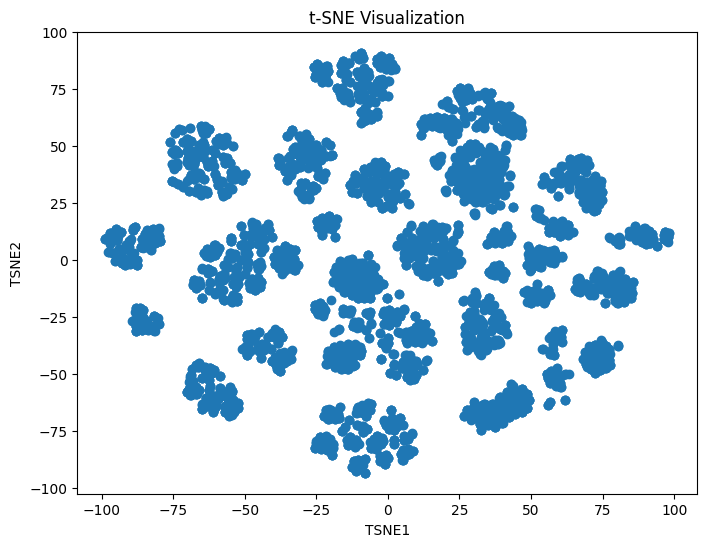

In [245]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show() 


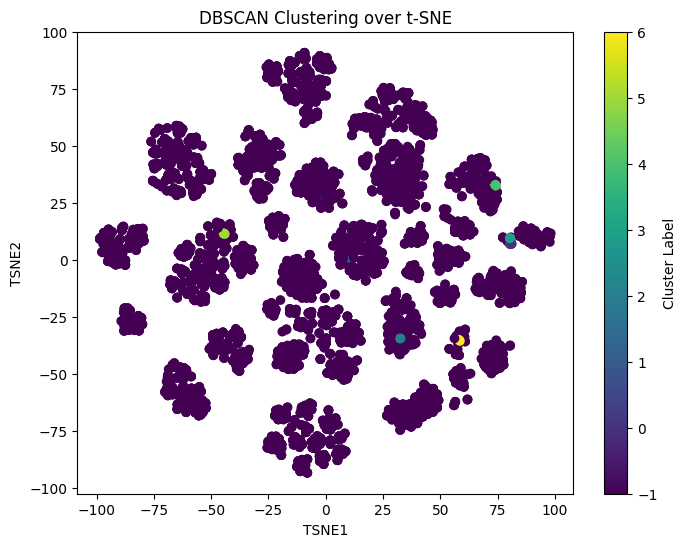

In [246]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_tsne)


df_tsne['Cluster'] = clusters


plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Cluster'])
plt.title('DBSCAN Clustering over t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster Label')
plt.show() 



C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


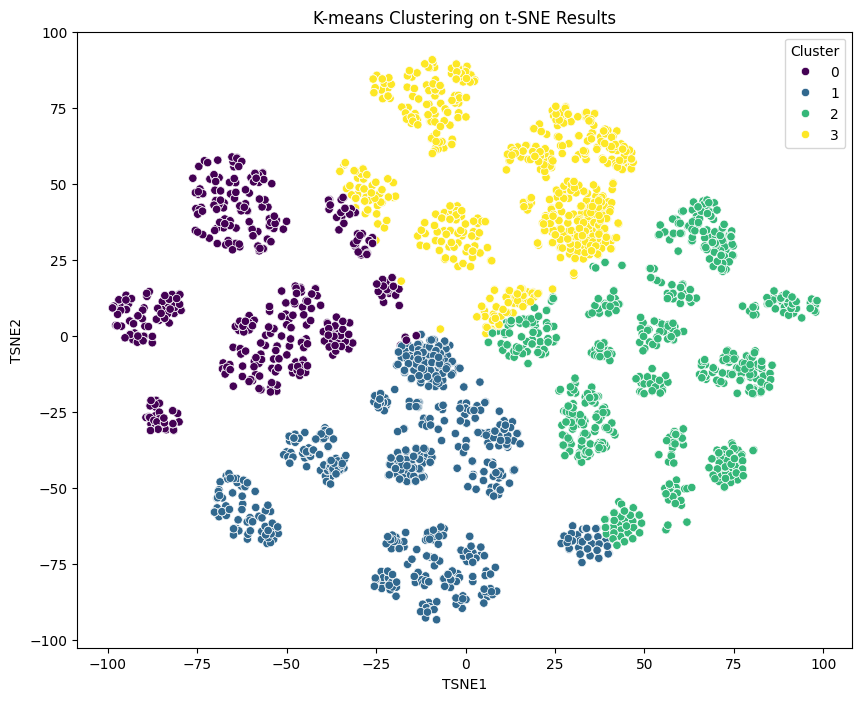

In [248]:
from sklearn.cluster import KMeans


k = 4  # Example number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)
df_tsne['Cluster'] = kmeans.fit_predict(df_tsne[['TSNE1', 'TSNE2']])
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('K-means Clustering on t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [249]:
silhouette_avg = silhouette_score(df_scaled_combined, df_tsne['Cluster'])

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette Score for 4 clusters: 0.029


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import seaborn as sns

# Assuming df_tsne already contains TSNE1 and TSNE2 columns
# Add the GMM labels to df_tsne for plotting
df_tsne['GMM_Cluster'] = gmm_labels

# Plotting with the correct labels
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('GMM Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is your dataset and df_tsne is the DataFrame with TSNE1 and TSNE2 columns

# Instantiate and fit the model
hierarchical = AgglomerativeClustering(n_clusters=6, linkage='ward')
# Perform hierarchical clustering on the t-SNE reduced dimensions
hierarchical_labels = hierarchical.fit_predict(df_tsne[['TSNE1', 'TSNE2']])

# Add the hierarchical clustering labels to df_tsne for plotting
df_tsne['Hierarchical_Cluster'] = hierarchical_labels

# Plotting the hierarchical clustering results
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Hierarchical_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('Hierarchical Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()
